<a href="https://colab.research.google.com/github/gc2321/3235-Machine-Learning/blob/main/XTRA_NEURO_NET_EXERCISES/5_autoencoder_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import tensorflow as tf
random.seed(42)

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


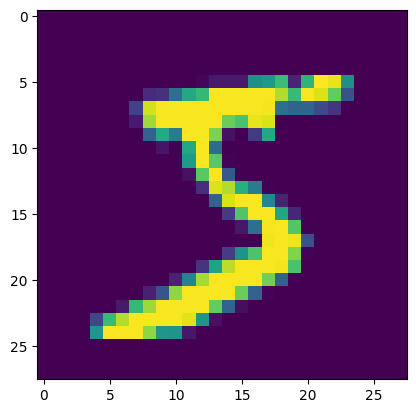

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[:3]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

## Basic AutoEncoder

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
# since each image is 28*28, total 784
# first layer is 784, next layer is 784/2 is approx 392

In [10]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [11]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [19]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [21]:
autoencoder.fit(X_train, X_train, epochs=5, validation_data=[X_test, X_test] )

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2513 - accuracy: 0.0715 - val_loss: 0.2510 - val_accuracy: 0.0702
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2510 - accuracy: 0.0718 - val_loss: 0.2507 - val_accuracy: 0.0687
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2507 - accuracy: 0.0719 - val_loss: 0.2504 - val_accuracy: 0.0743
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2504 - accuracy: 0.0720 - val_loss: 0.2501 - val_accuracy: 0.0705
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2501 - accuracy: 0.0724 - val_loss: 0.2498 - val_accuracy: 0.0710


In [22]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 135ms/step


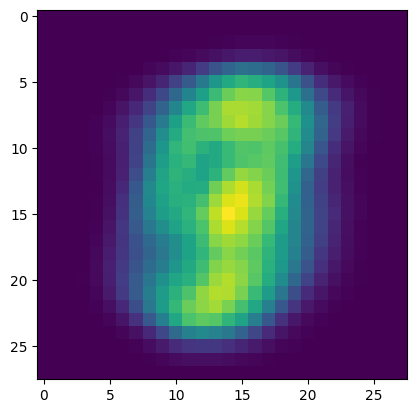

In [23]:
plt.imshow(passed_images[0])

## AutoEncoders for Denoising Images

In [24]:
from tensorflow.keras.layers import GaussianNoise

In [25]:
sample = GaussianNoise(0.2)

In [26]:
noisey = sample(X_test[0:2],training=True)

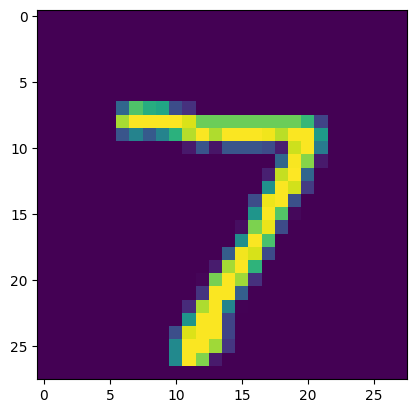

In [27]:
plt.imshow(X_test[0])

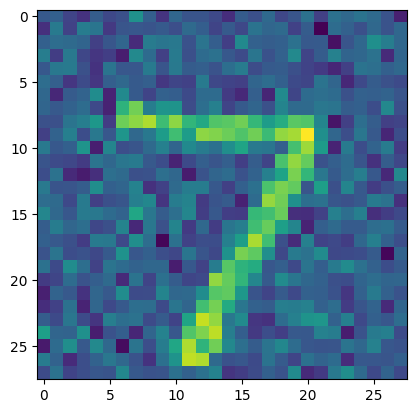

In [28]:
plt.imshow(noisey[0])

## Create noise removal autoencoder and train it

In [29]:
import tensorflow as tf
import numpy as np

In [30]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [31]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [32]:
noise_remover = Sequential([encoder, decoder])

In [33]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [34]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 33s 15ms/step - loss: 0.1688 - accuracy: 0.1837 - val_loss: 0.1323 - val_accuracy: 0.2292
Epoch 2/8
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1280 - accuracy: 0.2333 - val_loss: 0.1203 - val_accuracy: 0.2385
Epoch 3/8
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1199 - accuracy: 0.2454 - val_loss: 0.1138 - val_accuracy: 0.2505
Epoch 4/8
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1149 - accuracy: 0.2527 - val_loss: 0.1093 - val_accuracy: 0.2604
Epoch 5/8
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1116 - accuracy: 0.2594 - val_loss: 0.1075 - val_accuracy: 0.2638
Epoch 6/8
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1091 - accuracy: 0.2659 - val_loss: 0.1056 - val_accuracy: 0.2689
Epoch 7/8
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1075 - accuracy: 0.2703 - val_loss: 0.1032 - val_ac

In [35]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


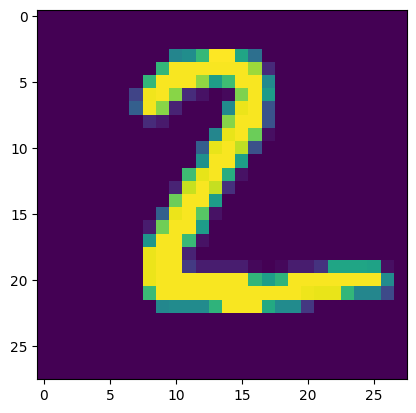

The Noisey Version


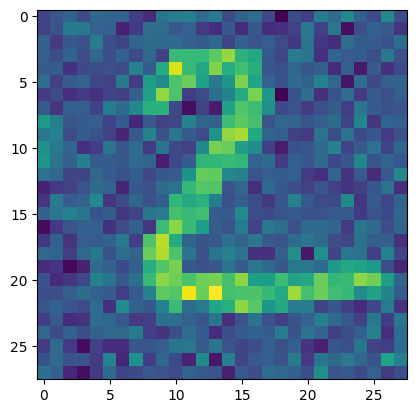

After going through denoiser


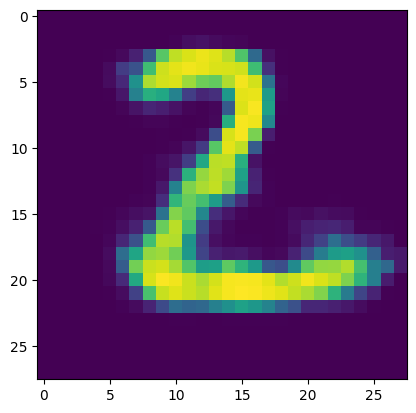

In [36]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()